In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('space_missions.csv',encoding='latin-1')

In [7]:
df.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [9]:
df.isnull().sum()

,0
Company,0
Location,0
Date,0
Time,127
Rocket,0
Mission,0
RocketStatus,0
Price,3365
MissionStatus,0


In [10]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [11]:
df['Price'] = df["Price"].replace(r"[^\d.]", "", regex=True).astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        4630 non-null   object        
 1   Location       4630 non-null   object        
 2   Date           4630 non-null   datetime64[ns]
 3   Time           4503 non-null   object        
 4   Rocket         4630 non-null   object        
 5   Mission        4630 non-null   object        
 6   RocketStatus   4630 non-null   object        
 7   Price          1265 non-null   float64       
 8   MissionStatus  4630 non-null   object        
 9   Year           4630 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 343.8+ KB


In [40]:
df.to_csv('final_Space_Mission.csv', index=False)

In [17]:
df['Year'] = df['Date'].dt.year

,Year
0,1957
1,1957
2,1957
3,1958
4,1958
...,...
4625,2022
4626,2022
4627,2022
4628,2022


In [15]:
mission_per_year = df['Year'].value_counts().sort_index()

In [16]:
mission_per_year

,count
Year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2018,117
2019,109
2020,119


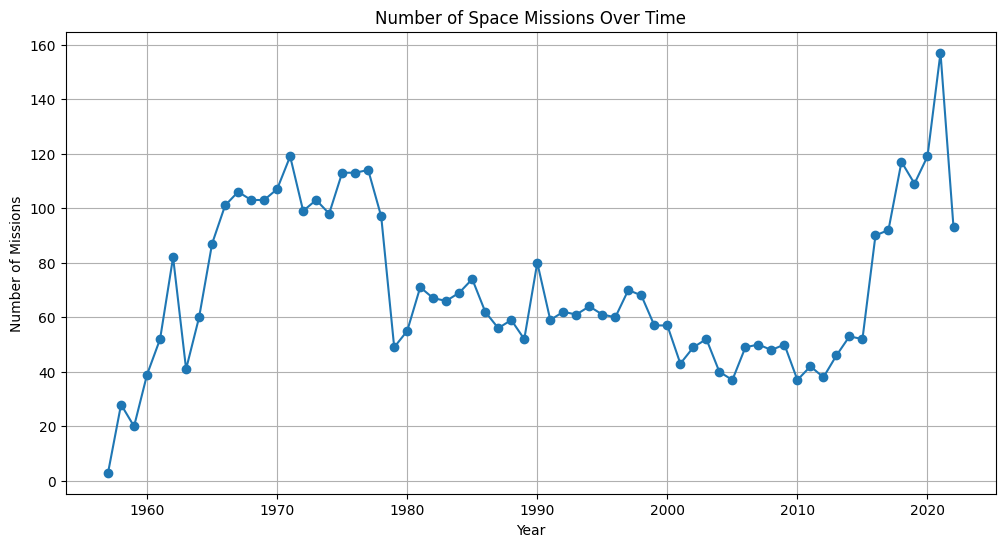

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(mission_per_year.index, mission_per_year.values, marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Number of Missions")
plt.title("Number of Space Missions Over Time")
plt.grid(True)
plt.show()

**The trend analysis shows a steady increase in the number of space missions over time, with noticeable peaks in certain years. There may be historical events or advancements in space exploration technology driving these peaks. Next, let's analyze the success rate of missions.**

In [25]:
mission_status_count = df['MissionStatus'].value_counts()
mission_status_count

,count
MissionStatus,
Success,4162
Failure,357
Partial Failure,107
Prelaunch Failure,4


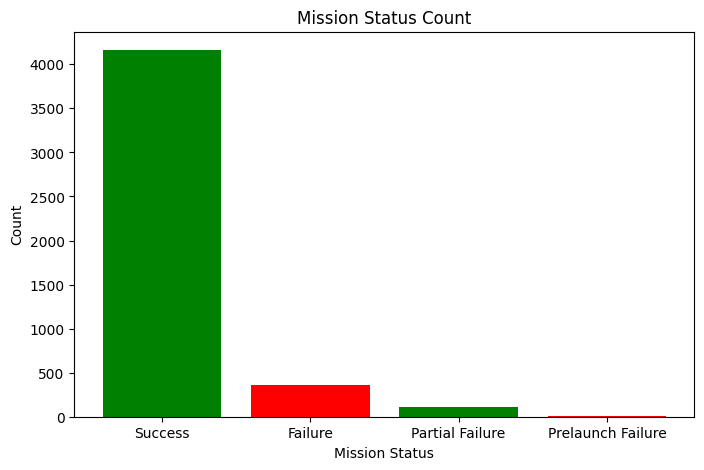

In [26]:
plt.figure(figsize=(8, 5))
plt.bar(mission_status_count.index,mission_status_count.values, color=['green', 'red'])
plt.xlabel('Mission Status')
plt.ylabel('Count')
plt.title('Mission Status Count')
plt.show()

**The analysis indicates that the majority of space missions have been successful, with a smaller proportion of failures. This suggests that space agencies and companies have improved mission reliability over time.**

In [27]:
df['Company'].unique()

array(['RVSN USSR', 'US Navy', 'AMBA', 'US Air Force', 'NASA',
       'General Dynamics', 'Martin Marietta', "Armée de l'Air", 'UT',
       'ASI', 'OKB-586', 'CECLES', 'Yuzhmash', 'CASC', 'CNES',
       'Roscosmos', 'ISAS', 'RAE', 'MHI', 'ISRO', 'ESA', 'Arianespace',
       'IAI', 'Boeing', 'Douglas', 'Northrop', 'Lockheed', 'VKS RF',
       'MITT', 'ILS', 'EER', 'AEB', 'SRC', 'KCST', 'Sea Launch',
       'Kosmotras', 'Eurockot', 'CASIC', 'Starsem', 'SpaceX', 'ULA',
       'Land Launch', 'ISA', 'KARI', 'JAXA', 'Khrunichev', 'Blue Origin',
       'Sandia', 'ExPace', 'Rocket Lab', 'Exos', 'Landspace', 'OneSpace',
       'i-Space', 'IRGC', 'Virgin Orbit', 'Astra', 'Galactic Energy',
       'Virgin Galactic', 'GK LS', 'Firefly', 'CAS Space'], dtype=object)

In [35]:
top_companies = df['Company'].value_counts().head(10)
top_companies

,count
Company,
RVSN USSR,1777
CASC,338
Arianespace,293
General Dynamics,251
VKS RF,216
NASA,203
SpaceX,182
US Air Force,161
ULA,151


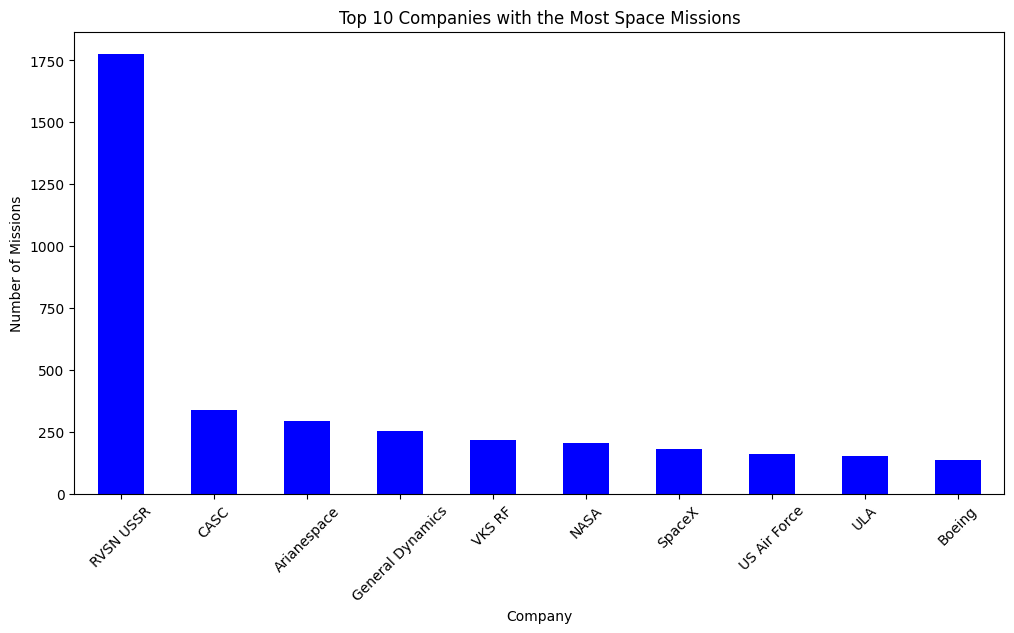

In [30]:
top_companies = df['Company'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_companies.plot(kind="bar", color="blue")
plt.xlabel("Company")
plt.ylabel("Number of Missions")
plt.title("Top 10 Companies with the Most Space Missions")
plt.xticks(rotation=45)
plt.show()

**The bar chart shows the top 10 companies that have conducted the most space missions. This highlights which organizations have been the most active in space exploration.**

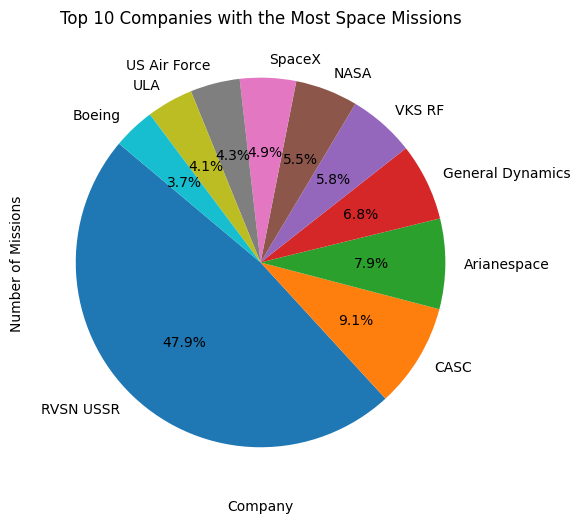

In [36]:
top_companies = df['Company'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.pie(top_companies, labels=top_companies.index, autopct='%1.1f%%', startangle=140)
plt.xlabel("Company")
plt.ylabel("Number of Missions")
plt.title("Top 10 Companies with the Most Space Missions")
plt.xticks(rotation=45)
plt.show()

In [38]:
df.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure,1958
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,18:27:00,Juno I,Explorer 2,Retired,NaN,Failure,1958
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,12:15:00,Vanguard,Vanguard 1,Retired,NaN,Success,1958
7,AMBA,"LC-5, Cape Canaveral AFS, Florida, USA",1958-03-26,17:38:00,Juno I,Explorer 3,Retired,NaN,Success,1958
8,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27,09:01:00,Sputnik 8A91,Sputnik-3 #1,Retired,NaN,Failure,1958
9,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-04-28,02:53:00,Vanguard,Vanguard TV5,Retired,NaN,Failure,1958


In [44]:
rocket_status_counts = df.groupby(['Company', 'RocketStatus']).size().unstack(fill_value=0)
rocket_status_counts

RocketStatus,Active,Retired
Company,,
AEB,0,3
AMBA,0,8
ASI,0,9
Arianespace,128,165
Armée de l'Air,0,4
...,...,...
VKS RF,42,174
Virgin Galactic,3,0
Virgin Orbit,5,0


In [46]:
top_companies_rockets = rocket_status_counts.sort_values(by=["Retired", "Active"], ascending=False).head(10)
top_companies_rockets

RocketStatus,Active,Retired
Company,,
RVSN USSR,0,1777
General Dynamics,0,251
NASA,0,203
VKS RF,42,174
Arianespace,128,165
US Air Force,0,161
Boeing,1,135
Martin Marietta,0,114
Lockheed,0,79


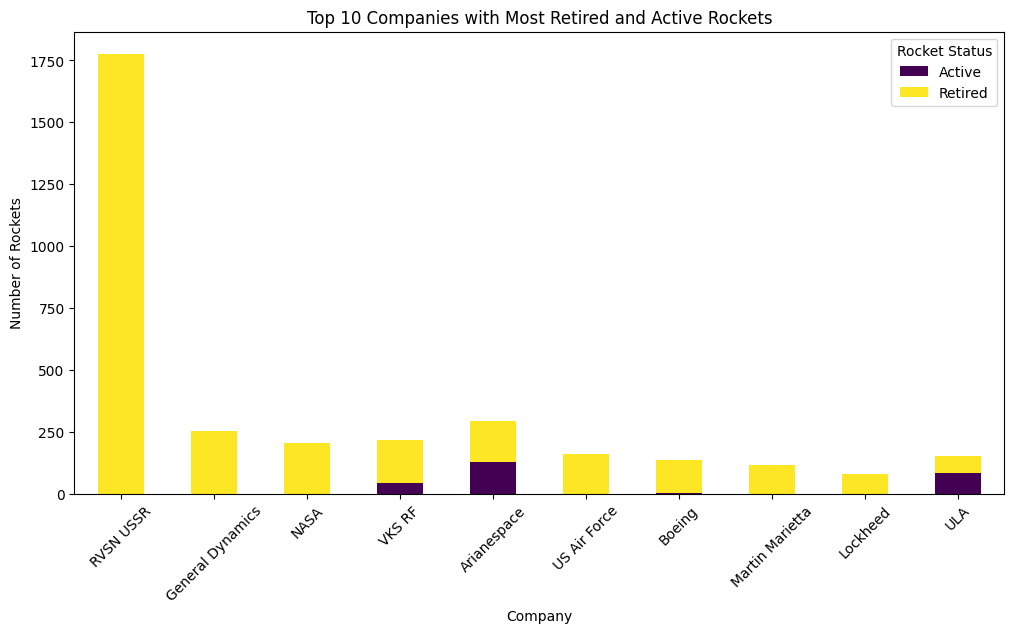

In [47]:
top_companies_rockets.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Company")
plt.ylabel("Number of Rockets")
plt.title("Top 10 Companies with Most Retired and Active Rockets")
plt.legend(title="Rocket Status")
plt.xticks(rotation=45)
plt.show()

**The bar chart illustrates the number of retired and active (working) rockets for the top 10 companies. Key observations:

Some companies, particularly older space agencies, have a higher proportion of retired rockets.
Companies with ongoing space programs, such as SpaceX or Roscosmos, likely have a mix of active and retired rockets.
The data highlights the longevity and evolution of different companies' rocket programs.**

In [52]:
missions_per_year = df.groupby('Year').size()
missions_per_year

,0
Year,
1957,3
1958,28
1959,20
1960,39
1961,52
...,...
2018,117
2019,109
2020,119


In [49]:
success_per_year = df[df['MissionStatus']  == 'Success'].groupby('Year').size()
success_per_year

,0
Year,
1957,2
1958,6
1959,8
1960,19
1961,32
...,...
2018,113
2019,100
2020,107


In [50]:
success_rate_per_year = (success_per_year / mission_per_year) * 100
success_rate_per_year

,0
Year,
1957,66.666667
1958,21.428571
1959,40.000000
1960,48.717949
1961,61.538462
...,...
2018,96.581197
2019,91.743119
2020,89.915966


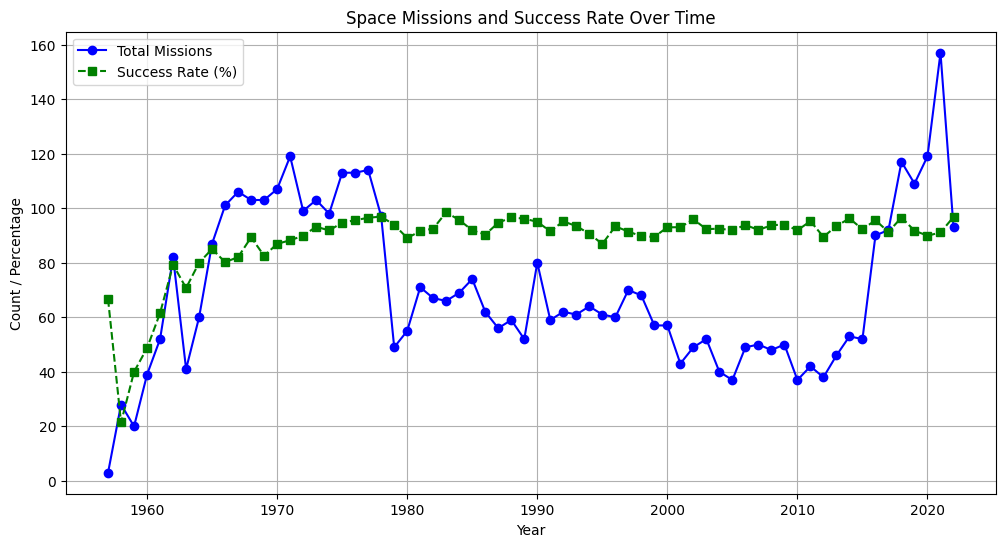

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(missions_per_year.index, missions_per_year.values, marker="o", linestyle="-", label="Total Missions", color="blue")
plt.plot(success_rate_per_year.index, success_rate_per_year.values, marker="s", linestyle="--", label="Success Rate (%)", color="green")

plt.xlabel("Year")
plt.ylabel("Count / Percentage")
plt.title("Space Missions and Success Rate Over Time")
plt.legend()
plt.grid(True)
plt.show()

Analysis of Trends Over Time

*   The blue line represents the total number of space missions per year.
*   The green dashed line shows the success rate (%) of missions each year.

Key Observations

*   The number of space missions has steadily increased over the years, with noticeable peaks.
*   The success rate has also improved over time, indicating advancements in space technology and mission reliability.
*   Some years might show dips in success rate, possibly due to experimental missions or new rocket technologies.






<ipython-input-54-cecff2f97c2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["MissionStatus"], y=df["Price"], palette="muted")


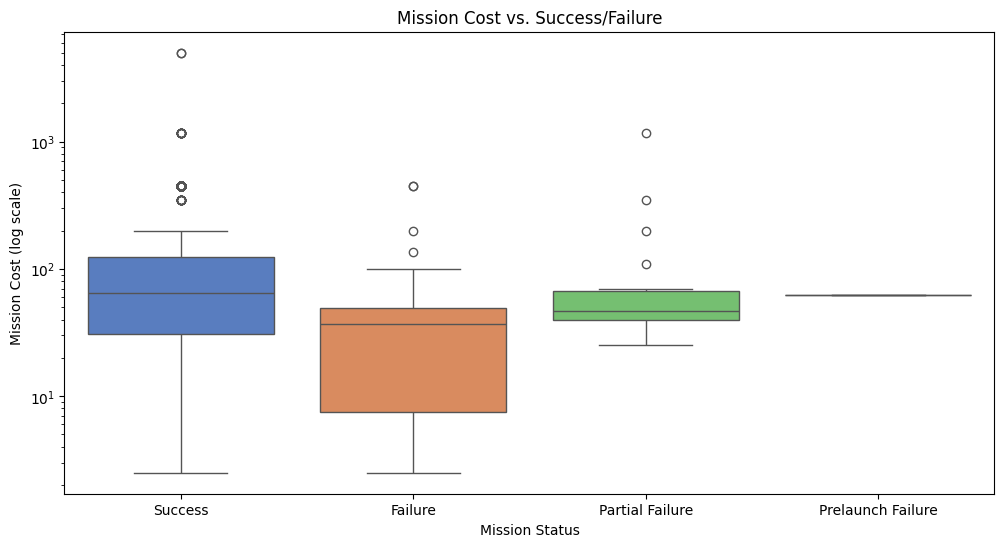

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["MissionStatus"], y=df["Price"], palette="muted")
plt.yscale("log")
plt.xlabel("Mission Status")
plt.ylabel("Mission Cost (log scale)")
plt.title("Mission Cost vs. Success/Failure")
plt.show()


**Mission Cost vs. Success/Failure**

The box plot shows the distribution of mission costs for different mission statuses.
Log scale is used to handle the wide range of costs.

**Key Insights**

Successful missions tend to have a wide range of costs, including high-budget projects.
Failed missions generally have lower median costs, indicating that lower-cost missions might have a higher risk of failure.
Prelaunch failures seem to have the lowest cost, likely because they fail before significant expenses are incurred.**